In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [7]:
# Load Dataset

path='/Users/a.omair/Documents/University/3rd year, 2nd term/ARTI 308 - Machine learning/Lab/Walmart_Sales.csv'
df = pd.read_csv(path)

# Display first 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Check all values
print(df.isna())

      Store   Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     False  False         False         False        False       False   
1     False  False         False         False        False       False   
2     False  False         False         False        False       False   
3     False  False         False         False        False       False   
4     False  False         False         False        False       False   
...     ...    ...           ...           ...          ...         ...   
6430  False  False         False         False        False       False   
6431  False  False         False         False        False       False   
6432  False  False         False         False        False       False   
6433  False  False         False         False        False       False   
6434  False  False         False         False        False       False   

        CPI  Unemployment  
0     False         False  
1     False         False  
2     False    

In [9]:
print(df.isna().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [10]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [11]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")
print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (6435, 8) 

number of rows:  6435
number of columns:  8


In [12]:
# viewing the data types of columns
df.dtypes

Store             int64
Date                str
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.dtypes

Store                    int64
Date            datetime64[us]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [16]:
# Statistical summary
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


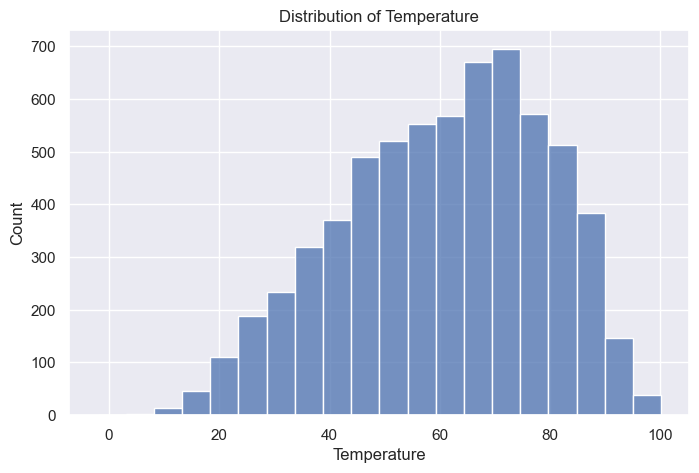

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature'], bins=20)
plt.title("Distribution of Temperature")
plt.show()

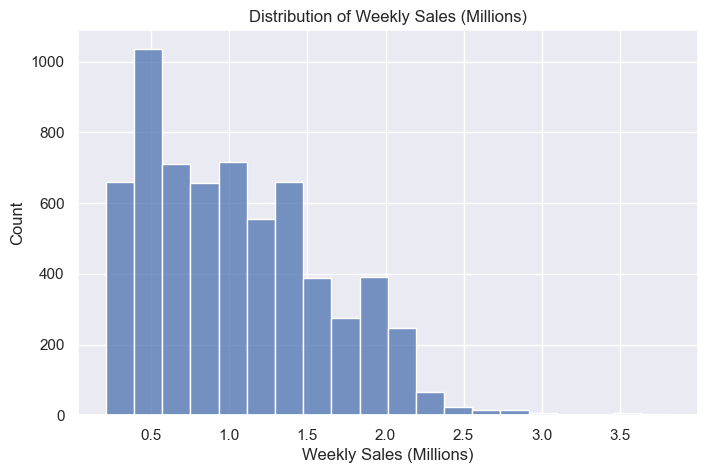

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'] / 1_000_000, bins=20)

plt.title("Distribution of Weekly Sales (Millions)")
plt.xlabel("Weekly Sales (Millions)")

plt.show()

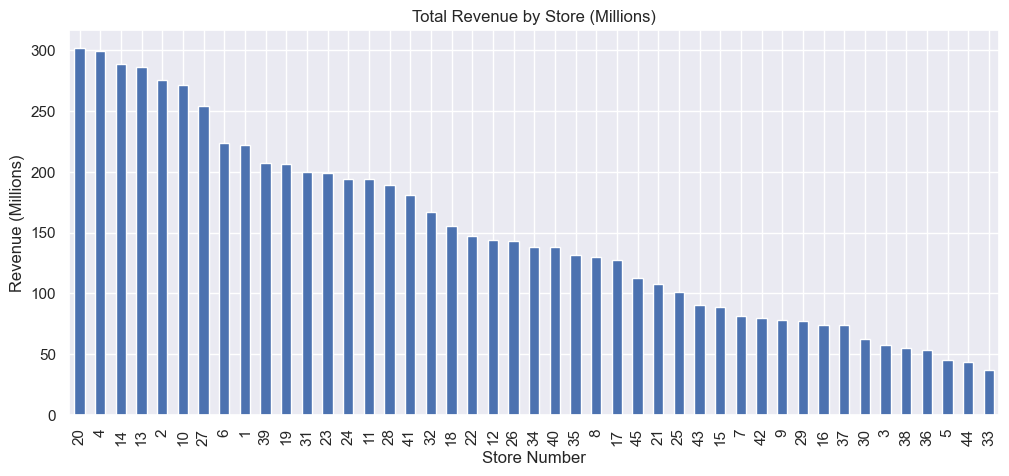

In [23]:
store_revenue = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
(store_revenue / 1_000_000).plot(kind='bar')

plt.title("Total Revenue by Store (Millions)")
plt.ylabel("Revenue (Millions)")
plt.xlabel("Store Number")

plt.show()


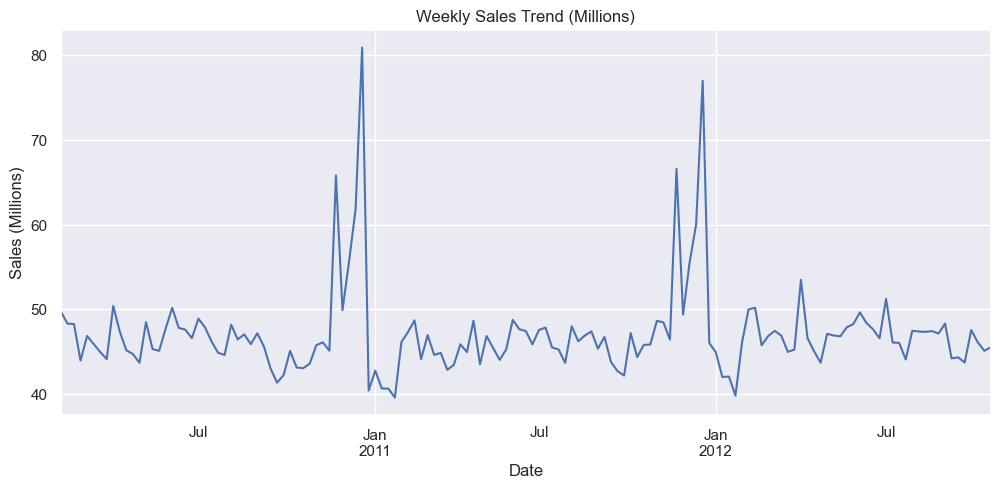

In [24]:
weekly_trend = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12,5))
(weekly_trend / 1_000_000).plot()

plt.title("Weekly Sales Trend (Millions)")
plt.ylabel("Sales (Millions)")
plt.xlabel("Date")

plt.show()


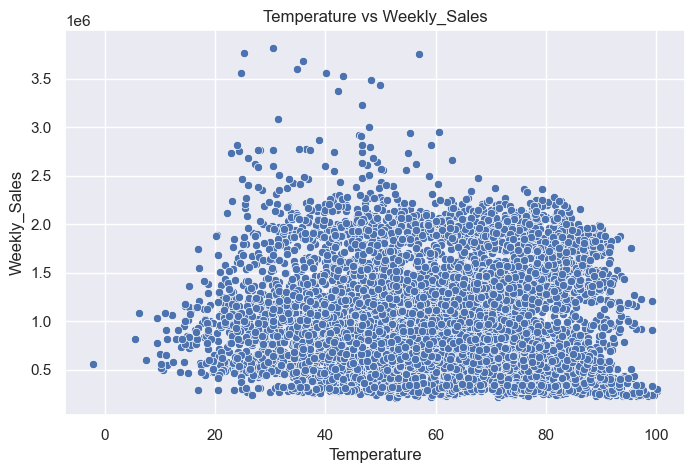

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title("Temperature vs Weekly_Sales")
plt.show()

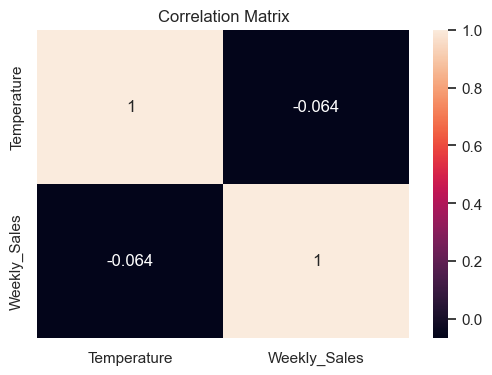

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Temperature', 'Weekly_Sales']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()